This code is to Solve Sod's Problem using the Richtmyer Method

In [51]:
import numpy as npy
import matplotlib.pyplot as PLT
from matplotlib import animation
import sympy
sympy.init_printing()

In [52]:
 rho, U, P, U_Vector,F_Vector, D_T, D_X, E_T= sympy.symbols('rho U P U_Vector F_Vector (d/dt) (d/dx) e_T')

In [53]:
EULER_Vector = sympy.Eq(D_T*U_Vector + D_X*F_Vector, 0)
EULER_Vector

The above fits the standard form of a conservation equation, only the 'Conserved Quantity" is the U_Vector and the Flux of this conserved quantity is the F_Vector, and both of them are 3X1 vectors

This first code below tries to set up the vector and initial conditions for U_Vector

In [54]:
#Standard X array sizes, dt, dx, and time steps
nx= 81                   
dx= 20.0/(nx-1)
dt=0.0002
nt=int(.01/dt)

x = npy.linspace(-10.,10.,nx)   #Sets up my X array
gamma=1.4  
n=len(x) 
    
U=npy.zeros((3,n),dtype=float)  #Sets up U as a 3 by n matrix where U[0] is density, U[1] is rho*U, and U[2]is pressure
#Each row,[0][1][2] is an n length array
#Pressure is calculated using the equation of state with gamma = 1.4
gamma=1.4
n=len(x)
    
U=npy.zeros((3,n),dtype=float)

    
NEG=npy.where(x<0)
    
U[0,NEG]=1
U[0,NEG[-1][-1]+1:]=0.125   #Density
    
U[1,NEG]=0.
U[1,NEG[-1][-1]+1:]=0.   #Velocity
    
U[2,NEG]=100000/(1.4-1)
U[2,NEG[-1][-1]+1:]=10000/(1.4-1)    #Pressure quantity

In [55]:
print(U)

[[  1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01   1.25000000e-01   1.25000000e-01   1.25000000e-01
    1.25000000e-01  

This Flux calculation function will be used and called in every iteration of the Richtmeyer method

In [56]:

def Flux_calc(U):
    gamma=1.4
    n=len(U[0,:])
    
    F=npy.zeros((3,n),dtype=float)
    
    F[0,:]=U[1,:]
    F[1,:]=(U[1,:]**2/U[0,:])+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:]))	
    F[2,:]=(U[2,:]+(gamma-1)*(U[2,:]-0.5*(U[1,:]**2/U[0,:])))*(U[1,:]/U[0,:])
    
    return F

In [57]:

def solver(u, nt, dt, dx):
    ustar=u.copy()

    for i in range(nt):
        un=u.copy()
        F=Flux_calc(un)
      
        ustar[:,:-1]=0.5*(un[:,1:]+un[:,:-1])-(dt/(2*dx))*(F[:,1:]-F[:,:-1])
        ustar[:,0]=ustar[:,1]
        Fs=Flux_calc(ustar)
    
        u[:,1:-1]=un[:,1:-1]-(dt/dx)*(Fs[:,1:-1]-Fs[:,:-2])
        u[:,0]=u[:,1]
        u[:,-1]=u[:,-2]
        
    return u

    

The Velocity is: [[ 292.61147153]]
The Presure is: [[ 30250.89016757]]
The Density is: [[ 0.3746914]]


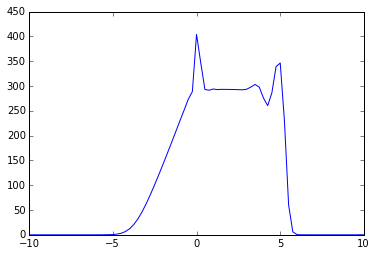

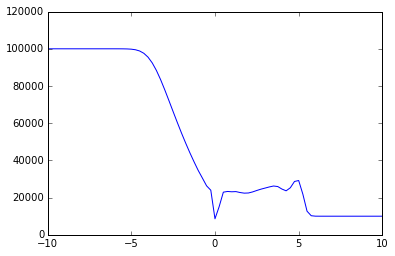

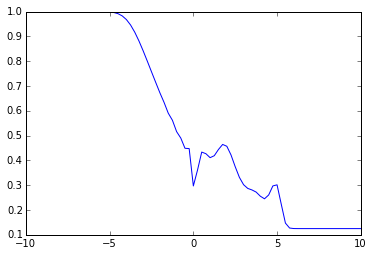

In [58]:

u=solver(U,nt,dt,dx)

RANGE=npy.where(x==2.5)
print ("The Velocity is:", u[1,RANGE]/u[0,RANGE])
print ("The Presure is:", 0.4*(u[2,RANGE]-0.5*u[1,RANGE]**2/u[0,RANGE]))
print ("The Density is:",u[0,RANGE])

%matplotlib inline
PLT.plot(x,u[1,:]/u[0,:])
PLT.show()

PLT.plot(x,0.4*(u[2,:]-u[1,:]**2/u[0,:]))
PLT.show()

PLT.plot(x,u[0,:])
PLT.show()
